https://github.com/sehrsam/sehrsam.github.io/blob/main/posts/perceptron/perceptron.py

The code for my update function is as follows:
    self.w += (2*(int(self.w@X_[var_check].T <0))-1)*X_[var_check]
    
self.w is the weight function which is stored as an instance variable of the perceptron. The 2*(int(self.w@X_[var_check].T)) will determine if we are adding or subtracting to w, creating a value of -1 or 1. *X_[var_check].T tells it the magnitude to increase or decrease w by. var_check is our randomly selected variable that we use to check and adjust w.

In this experiment, we will use two linearly seperable groups of data points, and run our perceptron on them.

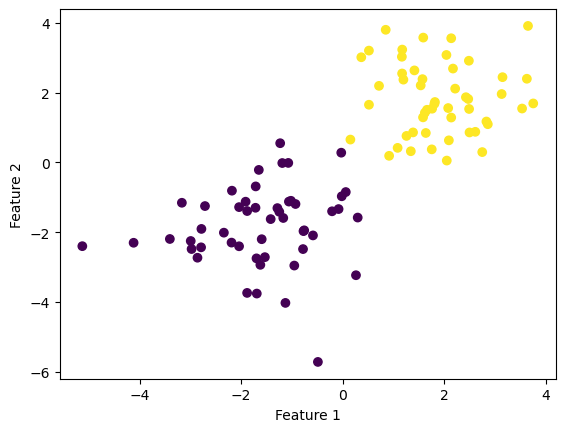

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(57698)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Here we have plotted the points. We can clearly see that they are linearly seperable. We now run our perceptron algorithm on them to find it.

In [2]:
from perceptron import Perceptron
p = Perceptron()
p.fit(X, y, 1000)
print(p.history)

[0.07, 0.18, 0.02, 0.33, 0.87, 0.48, 0.07, 0.35, 0.04, 0.07, 0.93, 0.45, 0.97, 0.99, 0.94, 0.09, 0.83, 0.01, 0.99, 0.85, 0.03, 0.28, 0.0, 0.02, 0.99, 0.76, 0.05, 0.71, 0.1, 0.01, 0.02, 0.65, 0.82, 0.07, 0.56, 0.05, 0.07, 0.95, 0.06, 0.99, 0.01, 0.98, 0.03, 0.01, 0.82, 0.01, 0.07, 0.88, 0.07, 0.94, 0.9, 0.03, 1.0]


After running the algorithm, we can print the history variable of the perceptron. This allows us to view the progression of our perceptron, and see how it oscillates between being more and less accurate before arriving at a w value which gives us a linear classifier.

In [3]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")



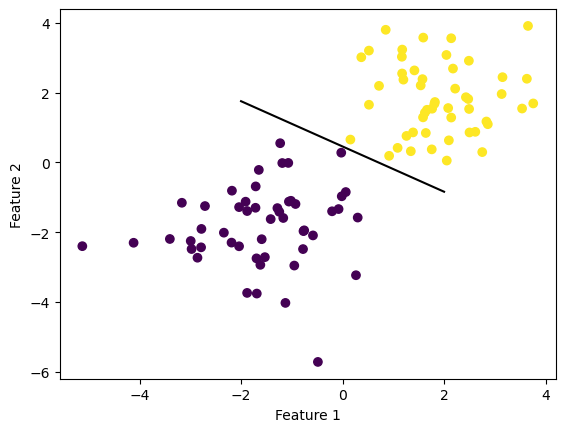

In [4]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can then graph this linear classifier, and see how it neatly bisects our two groups of data points.

Next, we will examine two groups of data points which are not linearly seperable.

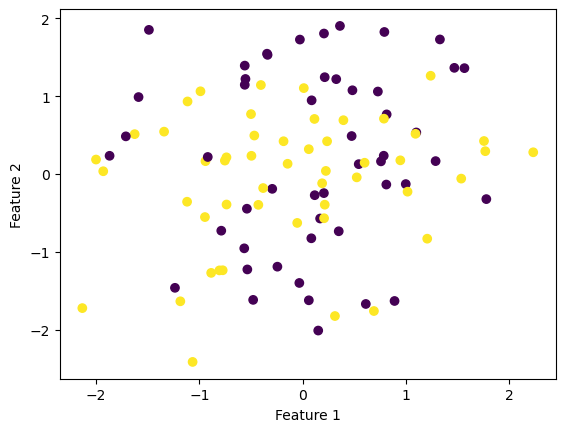

In [5]:

n = 100
p_features = 3

X_1, y_1 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(0,0), (0,0)])

fig = plt.scatter(X_1[:,0], X_1[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

After graphing the points, it is clear that they are not linearly seperable. As such, if we run our perceptron on them we
would expect it to not find a linear classifier, and to run until it has reached the maximum allowed runs

In [6]:

p.fit(X_1, y_1, 100)
print(p.history)

[0.49, 0.44, 0.46, 0.46, 0.45, 0.5, 0.59, 0.55, 0.54, 0.56, 0.5, 0.56, 0.56, 0.56, 0.59, 0.56, 0.53, 0.52, 0.5, 0.5, 0.52, 0.47, 0.5, 0.51, 0.51, 0.51, 0.53, 0.47, 0.46, 0.53, 0.49, 0.51, 0.46, 0.51, 0.47, 0.48, 0.47, 0.45, 0.5, 0.51, 0.49, 0.51, 0.48, 0.57, 0.47, 0.44, 0.47, 0.46, 0.53, 0.5, 0.45, 0.51, 0.5, 0.57, 0.5, 0.46, 0.56, 0.49, 0.45, 0.47, 0.56, 0.45, 0.5, 0.46, 0.48, 0.43, 0.5, 0.43, 0.5, 0.48, 0.51, 0.5, 0.53, 0.51, 0.52, 0.6, 0.5, 0.46, 0.52, 0.49, 0.46, 0.47, 0.47, 0.44, 0.55, 0.57, 0.54, 0.51, 0.47, 0.49, 0.54, 0.54, 0.5, 0.42, 0.5, 0.44, 0.44, 0.46, 0.5, 0.52]


Doing this, we see what we expected. Our perceptron runs for the maximum allowed time, and never comes up with a w that produces a 1.0 accuracy.

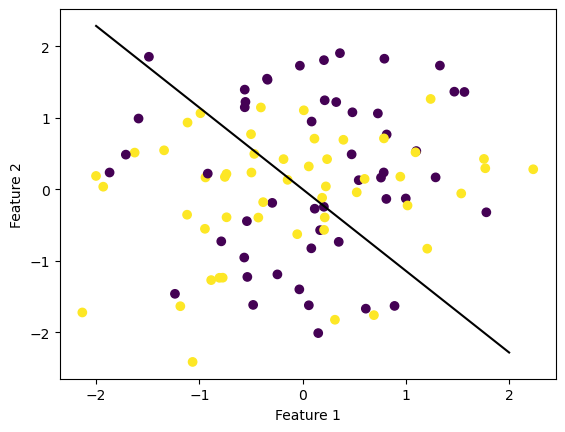

In [7]:
fig = plt.scatter(X_1[:,0], X_1[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Plotting the line given by w we get a random line, which makes sense.

We can now try running the perceptron on data with more than 2 features. We can generate the points, and run our perceptron on them.

In [8]:

X_2, y_2 = make_blobs(n_samples = 100, n_features = 5, centers=[(1,1,1,0,0),(0,0,0,0,0)])

p.fit(X_2, y_2, 200)

print(p.history)

[0.68, 0.52, 0.37, 0.53, 0.44, 0.51, 0.55, 0.65, 0.42, 0.41, 0.43, 0.47, 0.48, 0.46, 0.66, 0.49, 0.43, 0.48, 0.72, 0.65, 0.48, 0.55, 0.46, 0.53, 0.74, 0.69, 0.53, 0.44, 0.45, 0.64, 0.72, 0.63, 0.66, 0.51, 0.39, 0.4, 0.46, 0.48, 0.54, 0.47, 0.49, 0.45, 0.36, 0.35, 0.48, 0.42, 0.45, 0.38, 0.55, 0.43, 0.54, 0.51, 0.48, 0.69, 0.67, 0.63, 0.48, 0.46, 0.48, 0.65, 0.59, 0.68, 0.48, 0.65, 0.72, 0.68, 0.69, 0.46, 0.64, 0.65, 0.62, 0.48, 0.43, 0.36, 0.55, 0.46, 0.33, 0.44, 0.5, 0.36, 0.37, 0.54, 0.57, 0.67, 0.67, 0.75, 0.69, 0.69, 0.57, 0.41, 0.48, 0.43, 0.47, 0.56, 0.7, 0.71, 0.69, 0.62, 0.54, 0.54, 0.43, 0.47, 0.33, 0.54, 0.41, 0.38, 0.53, 0.4, 0.49, 0.59, 0.42, 0.46, 0.33, 0.51, 0.57, 0.53, 0.66, 0.65, 0.65, 0.7, 0.68, 0.61, 0.55, 0.54, 0.61, 0.59, 0.74, 0.5, 0.55, 0.49, 0.38, 0.35, 0.57, 0.65, 0.61, 0.43, 0.64, 0.41, 0.36, 0.33, 0.45, 0.54, 0.35, 0.54, 0.36, 0.47, 0.48, 0.36, 0.57, 0.53, 0.42, 0.54, 0.48, 0.33, 0.33, 0.32, 0.29, 0.32, 0.38, 0.35, 0.44, 0.48, 0.37, 0.48, 0.52, 0.34, 0.4, 0.51

This set of points most likely is not linearly seperable, as the perceptron did not end up arriving at an accuracy of 1.0.
If we test again with slightly altered parameters:

In [9]:
X_2, y_2 = make_blobs(n_samples = 100, n_features = 7, centers=[(2,2,2,2,2,2,2),(-1,-1,-1,-1,-1,-1,-1)])

p.fit(X_2, y_2, 200)
print(p.history)

[0.99, 0.64, 0.08, 0.78, 0.99, 0.24, 0.85, 0.34, 0.04, 0.35, 1.0]


We can see that the perceptron can still converge on data sets with multiple functions. As such, we can also determine that this set of points are linearly seperable.

The runtime of equation 1 is O(p), since the dot product will compute p total multiplications, and it is then added to and multiplied by these same p dimensional arrays, but only a set amount of times, so they don't add to the complexity.